## Importing the required libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Dataset

In [33]:
df = pd.read_csv('cleveland.csv')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

About the variables
<ol>
    <li>Age : displays the age of the individual.</li>
<li>Sex : displays the gender of the individual using the following format :
1 = male
0 = female</li>
<li>Chest-pain type : displays the type of chest-pain experienced by the individual using the following format :
1 = typical angina
2 = atypical angina
3 = non — anginal pain
4 = asymptotic</li>
<li>Resting Blood Pressure : displays the resting blood pressure value of an individual in mmHg (unit)</li>
<li>Serum Cholestrol : displays the serum cholestrol in mg/dl (unit)</li>
<li>Fasting Blood Sugar : compares the fasting blood sugar value of an individual with 120mg/dl.
If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)</li>
<li>Resting ECG : displays resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy</li>
<li>Max heart rate achieved : displays the max heart rate achieved by an individual.
<li>Exercise induced angina :
1 = yes
0 = no</li>
<li>ST depression induced by exercise relative to rest : displays the value which is integer or float.
Peak exercise ST segment :
1 = upsloping
2 = flat
3 = downsloping</li>
<li>Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
Thal : displays the thalassemia :
3 = normal
6 = fixed defect
7 = reversible defect</li>
<li>Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
0 = absence
    1, 2, 3, 4 = present.</li>

## Data preprocessing

Displaying the first 10 rows of the Dataset

In [34]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
5,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
6,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
7,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
8,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1
9,57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0


Reading the last ten rows of the dataset

In [35]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
292,63,1,4,140,187,0,2,144,1,4.0,1,2.0,7.0,2
293,63,0,4,124,197,0,0,136,1,0.0,2,0.0,3.0,1
294,41,1,2,120,157,0,0,182,0,0.0,1,0.0,3.0,0
295,59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,3
296,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
297,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
298,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
299,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
300,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
301,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


looking at some basic statistical parameters of our dataset

Checking for Null values

In [36]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

We fill the null values with mean

In [37]:
df = df.fillna(df.mean)

In [38]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [39]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


## Visualizing our data

 look at the people’s age who are suffering from the disease or not.
Here, target = 1 implies that the person is suffering from heart disease and target = 0 implies the person is not suffering.

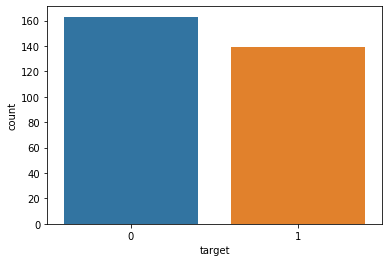

In [40]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
sns.countplot(x='target',data=df)

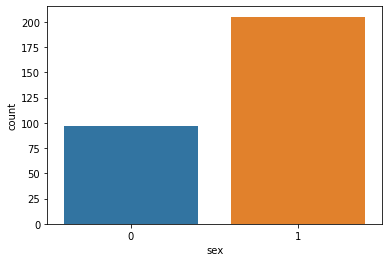

In [12]:
sns.countplot(x='sex',data=df,)

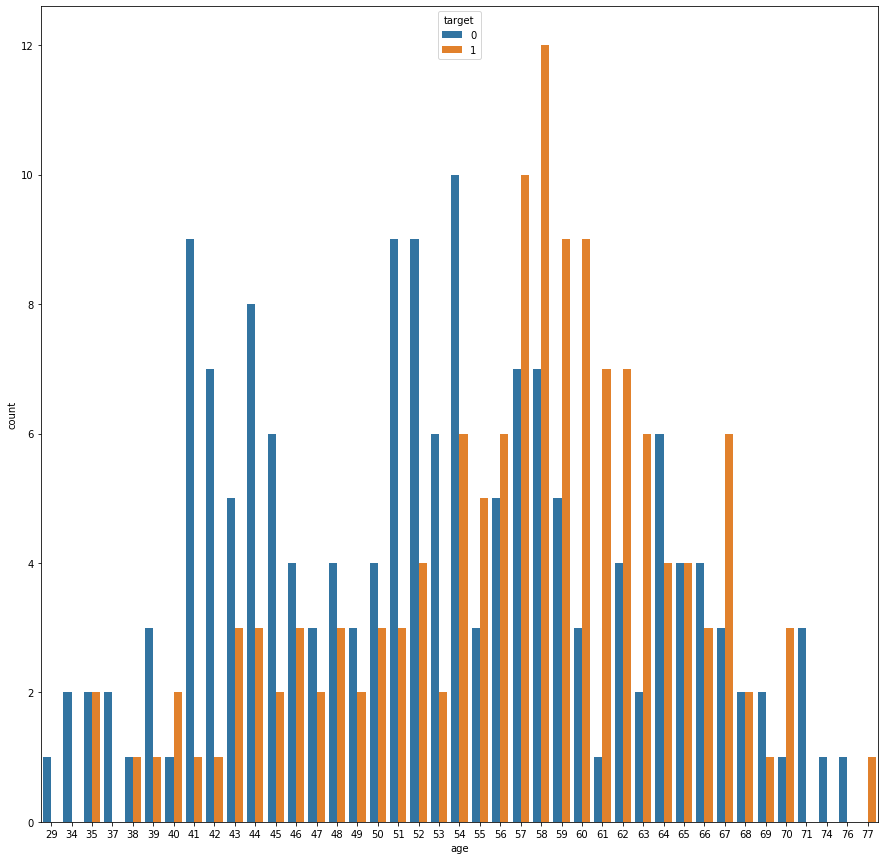

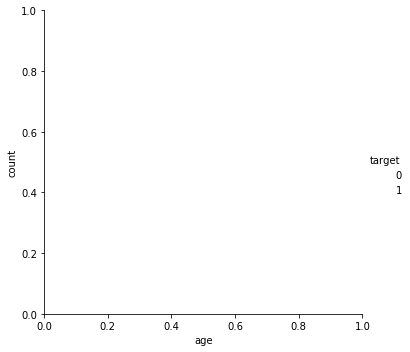

In [41]:
fig, ax = plt.subplots(figsize=(15,15))
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique(),ax=ax)

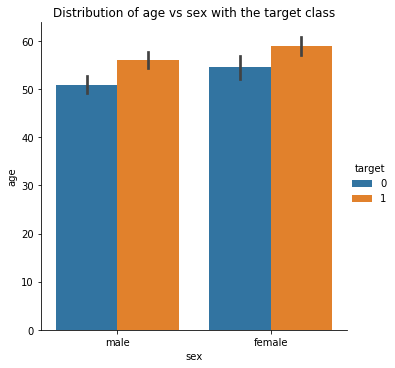

In [14]:
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()
df['sex'] = df.sex.map({'female': 0, 'male': 1})

Creating a box plot to detect outliers


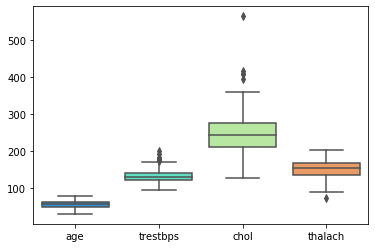

In [42]:
sns.boxplot(data=df[['age','trestbps','chol','thalach']],palette='rainbow')

In [24]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [44]:
from scipy import stats
import numpy as np
df = pd.read_csv('heart.csv')
z = np.abs(stats.zscore(df))
print(z.shape)

(303, 14)


In [45]:
threshold = 3
print(np.where(z > 3))

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281]), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12]))


In [46]:
df = df[(z < 3).all(axis=1)]

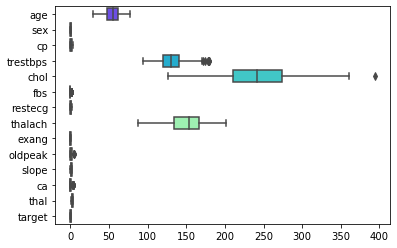

In [47]:
sns.boxplot(data=df,palette='rainbow',orient='h')

In [48]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


creating a correlation matrix

In [49]:
df.corr(method='spearman')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.072653,-0.081270,0.305326,0.173376,0.127242,-0.120855,-0.400414,0.109087,0.247576,-0.170819,0.392071,0.074372,-0.242215
sex,-0.072653,1.000000,-0.068989,-0.040717,-0.123255,0.058432,-0.099196,-0.055246,0.146867,0.147242,-0.044954,0.140431,0.284911,-0.302926
cp,-0.081270,-0.068989,1.000000,0.048678,-0.091024,0.113181,0.062173,0.313205,-0.406803,-0.129777,0.121677,-0.234311,-0.194014,0.436242
trestbps,0.305326,-0.040717,0.048678,1.000000,0.130814,0.148502,-0.113506,-0.053359,0.051408,0.148048,-0.082514,0.047390,0.036541,-0.105524
chol,0.173376,-0.123255,-0.091024,0.130814,1.000000,0.001142,-0.128050,-0.052056,0.091050,0.021421,-0.005679,0.127102,0.054486,-0.116170
fbs,0.127242,0.058432,0.113181,0.148502,0.001142,1.000000,-0.069971,-0.006491,-0.009093,0.019646,-0.032509,0.135116,-0.000822,-0.011438
restecg,-0.120855,-0.099196,0.062173,-0.113506,-0.128050,-0.069971,1.000000,0.089033,-0.079105,-0.062419,0.111071,-0.094153,0.016379,0.141893
thalach,-0.400414,-0.055246,0.313205,-0.053359,-0.052056,-0.006491,0.089033,1.000000,-0.402875,-0.428884,0.426769,-0.306806,-0.166110,0.432858
exang,0.109087,0.146867,-0.406803,0.051408,0.091050,-0.009093,-0.079105,-0.402875,1.000000,0.292059,-0.259240,0.186467,0.250364,-0.429082
oldpeak,0.247576,0.147242,-0.129777,0.148048,0.021421,0.019646,-0.062419,-0.428884,0.292059,1.000000,-0.574742,0.250377,0.230217,-0.411032


Checking the most negetively correlated vairables

In [50]:
df.corr(method='spearman').min()

age        -0.400414
sex        -0.302926
cp         -0.406803
trestbps   -0.113506
chol       -0.128050
fbs        -0.069971
restecg    -0.128050
thalach    -0.428884
exang      -0.429082
oldpeak    -0.574742
slope      -0.574742
ca         -0.495302
thal       -0.399860
target     -0.495302
dtype: float64

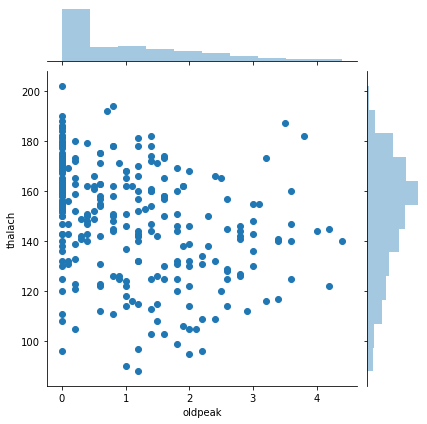

In [51]:
sns.jointplot(x='oldpeak',y='thalach',data=df,kind='scatter')

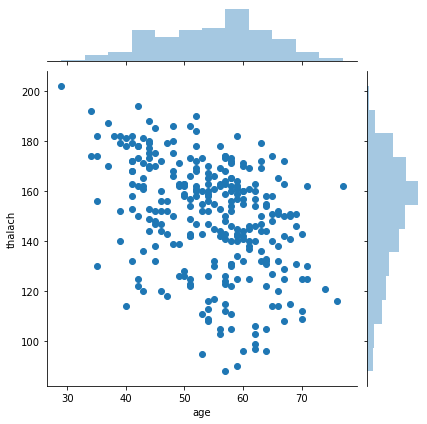

In [52]:
sns.jointplot(x='age',y='thalach',data=df,kind='scatter')

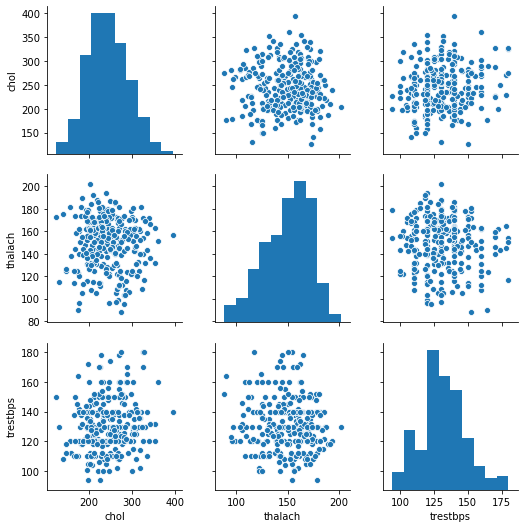

In [53]:
sns.pairplot(df[['chol','thalach','trestbps']])

<h1>Standardizing our data</h1>

In [54]:
df=(df-df.mean())/df.std()

In [55]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952973,0.669275,1.954817,0.822489,-0.250470,2.445219,-1.011545,0.008653,-0.696670,1.198428,-2.323604,-0.712182,-2.246591,0.902004
1,-1.906330,0.669275,0.990843,-0.060287,0.119734,-0.407536,0.885928,1.649409,-0.696670,2.308836,-2.323604,-0.712182,-0.536322,0.902004
2,-1.466437,-1.488948,0.026870,-0.060287,-0.881993,-0.407536,-1.011545,0.984238,-0.696670,0.365622,0.969603,-0.712182,-0.536322,0.902004
3,0.183161,0.669275,0.026870,-0.648804,-0.185140,-0.407536,0.885928,1.250306,-0.696670,-0.189582,0.969603,-0.712182,-0.536322,0.902004
4,0.293134,-1.488948,-0.937103,-0.648804,2.384507,-0.407536,0.885928,0.585135,1.430398,-0.374650,0.969603,-0.712182,-0.536322,0.902004


In [56]:
df.mean()

age         5.055963e-16
sex        -3.288117e-16
cp         -8.280010e-16
trestbps   -3.392079e-16
chol       -9.516197e-17
fbs         1.547349e-17
restecg     2.599547e-16
thalach    -6.220344e-16
exang       8.912731e-16
oldpeak     4.139159e-17
slope      -2.050238e-16
ca          6.081082e-16
thal       -6.003715e-16
target     -8.123583e-16
dtype: float64

In [57]:
df.std()

age         1.0
sex         1.0
cp          1.0
trestbps    1.0
chol        1.0
fbs         1.0
restecg     1.0
thalach     1.0
exang       1.0
oldpeak     1.0
slope       1.0
ca          1.0
thal        1.0
target      1.0
dtype: float64

<h1>Normalizing the data</h1>

In [58]:
df=(df-df.min())/(df.max()-df.min()) #Normalization of data

In [59]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.593023,0.399254,1.0,0.0,0.543860,0.0,0.522727,0.0,0.0,0.0,1.0
1,0.166667,1.0,0.666667,0.418605,0.462687,0.0,0.5,0.868421,0.0,0.795455,0.0,0.0,0.5,1.0
2,0.250000,0.0,0.333333,0.418605,0.291045,0.0,0.0,0.736842,0.0,0.318182,1.0,0.0,0.5,1.0
3,0.562500,1.0,0.333333,0.302326,0.410448,0.0,0.5,0.789474,0.0,0.181818,1.0,0.0,0.5,1.0
4,0.583333,0.0,0.000000,0.302326,0.850746,0.0,0.5,0.657895,1.0,0.136364,1.0,0.0,0.5,1.0


In [60]:
df.mean()

age         0.527802
sex         0.689895
cp          0.324042
trestbps    0.430516
chol        0.442171
fbs         0.142857
restecg     0.266551
thalach     0.542148
exang       0.327526
oldpeak     0.228381
slope       0.705575
ca          0.219512
thal        0.656794
target      0.550523
dtype: float64

In [61]:
df.std()

age         0.189440
sex         0.463344
cp          0.345791
trestbps    0.197580
chol        0.171346
fbs         0.350538
restecg     0.263508
thalach     0.197812
exang       0.470131
oldpeak     0.245610
slope       0.303655
ca          0.308225
thal        0.292352
target      0.498310
dtype: float64

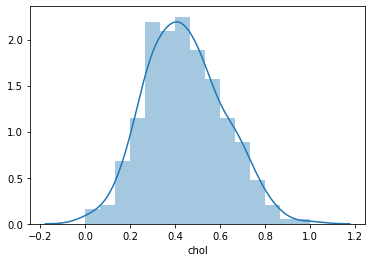

In [62]:
sns.distplot(df['chol'])

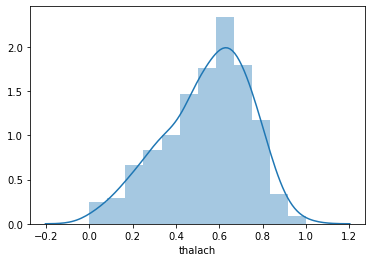

In [63]:
sns.distplot(df['thalach'])

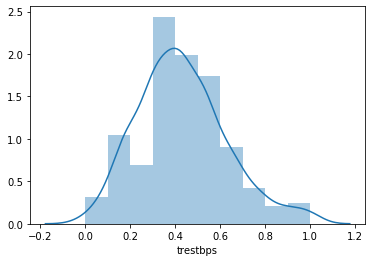

In [64]:
sns.distplot(df['trestbps'],bins=10)

In [65]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

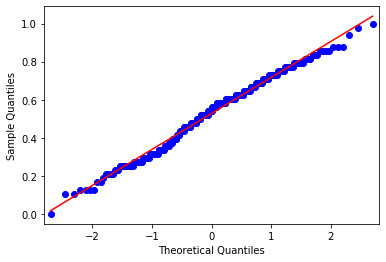

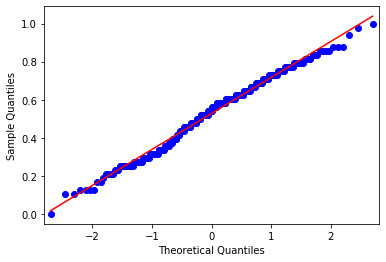

In [66]:
qqplot(df['age'],line='s')

In [67]:
from sklearn.preprocessing import scale
#from scipy import stats
from statsmodels.stats import weightstats as mm

In [68]:
n=len(df["chol"])
mean=df["chol"].mean()
sd=df["chol"].std()
(n,mean,sd)

(287, 0.44217067970253254, 0.17134596544546532)

In [69]:
ztest,pvals=mm.ztest(df["chol"],value=0.200,alternative="larger")
#value is the null hypothesis; larger is for alternate hypothesis: means prop > value.
print("p-value",pvals)

p-value 5.392599125583303e-127


In [70]:
if pvals<=0.05:
    print("We reject NULL hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject NULL hypothesis


In [71]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
seed(1)

In [72]:
data1=df['oldpeak']
data2=df['slope']

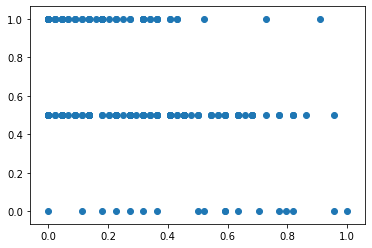

In [73]:
plt.scatter(data1,data2)
plt.show()

In [74]:
corr,_ =pearsonr(data1,data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.546


In [ ]:
#oldpeak and slope are negetively correlated as correlation coefficient is negetive

In [79]:
data3=df['oldpeak']
data4=df['slope']

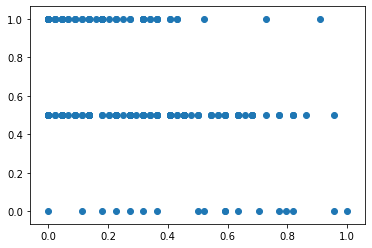

In [80]:
pyplot.scatter(data3,data4)
pyplot.show()